### 01. 순환 신경망(Recurrent Neural Network, RNN)
- 시퀀스 모델
    - 입력과 출력을 시퀀스 단위로 처리하는 모델
    - 이러한 시퀀스들을 처리하기 위해 고안된 모델
    - 그 중에서도 RNN은 딥러닝에 있어 가장 기본적인 시퀀스 모델
- 번역기를 생각해보면 입력은 번역하고자 하는 문장(즉, 단어 시퀀스), 출력에 해당되는 번역된 문장 또한 단어 시퀀스

#### 1. 순환 신경망(RNN)

##### 1)
- 앞서 배운 신경망들은 전부 은닉층에서 활성화 함수를 지난 값은 오직 출력층 방향으로만 향했다.
    - 이와 같은 신경망들을 피드 포워드 신경망(Feed Forward Neural Network)
- 그렇지 않은 신경망
    - RNN(Recurrent Neural Network) 또한 그 중 하나
    - RNN은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖는다.


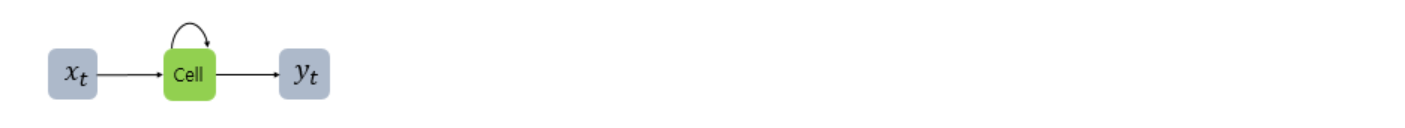

In [1]:
from IPython.display import Image
Image("r1.PNG")

##### 2)
- 변수 설명
    - x : 입력층의 입력 벡터
    - y : 출력층의 출력 벡터
    - b : 실제로는 편향 b도 입력으로 존재할 수 있지만 그림에서 생략
- 셀(cell)
    - RNN에서 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드
    - 이 셀은 이전의 값을 기억하려고 하는 일종의 메모리 역할을 수행하므로 이를 **메모리 셀** 또는 **RNN 셀**이라고 표현한다.

##### 3) 
- 은닉층의 메모리 셀
    - 각각의 시점(time step)에서 바로 이전 시점에서의 은닉층의 메모리 셀에서 나온 값을 자신의 입력으로 사용하는 재귀적 활동을 하고 있다.
    - 현재 시점을 t로 표현했을 때, 이는 현재 시점 t에서의 메모리 셀이 갖고 있는 값은 과거의 메모리 셀들의 값에 영향을 받은 것을 의미한다.
    - 메모리 셀이 갖고 있는 이 값은 뭐라고 부르는가 ? 
- **은닉 상태(hidden state)**
    - 메모리 셀이 출력층 방향으로 또는 t+1의 자신에게 보내는 값
    - t 시점의 메모리 셀은 t-1 시점의 메모리 셀이 보낸 은닉 상태값을 t 시점의 은닉 상태 계산을 위한 입력값으로 사용

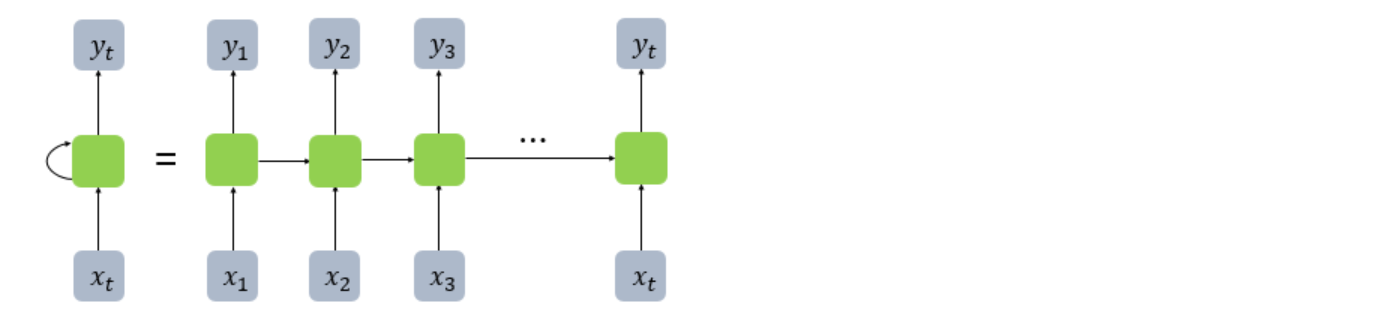

In [2]:
Image("r2.PNG")

- 그림 설명
    - RNN을 표현할 때는 일반적으로 위의 그림에서 좌측과 같이 화살표로 사이클을 글서 재귀 형태로 표현
    - 우측과 같이 사이클을 그리는 화살표 대신 여러 시점으로 펼쳐서 표현
    - 두 그림은 동일한 그림으로 단지 사이클을 그리는 화살표를 사용하여 표현하였는지, 시점의 흐름을 따라서 표현하였는지의 차이일 뿐 둘 다 동일한 RNN을 표현

##### 4)
- 피드 포워드 신경망에의 단위 : 뉴런
- RNN에서의 표현
    - 입력층과 출력층 : 입력 벡터, 출력 벡터
    - 은닉층 : 은닉 상태
    - 위의 그림에서 초록색, 회색으로 표현한 각 네모들은 기본적으로 벡터 단위를 가정

##### 5) 피드 포워드 신경망과의 차이를 비교하기 위해 RNN을 뉴런 단위로 시각화

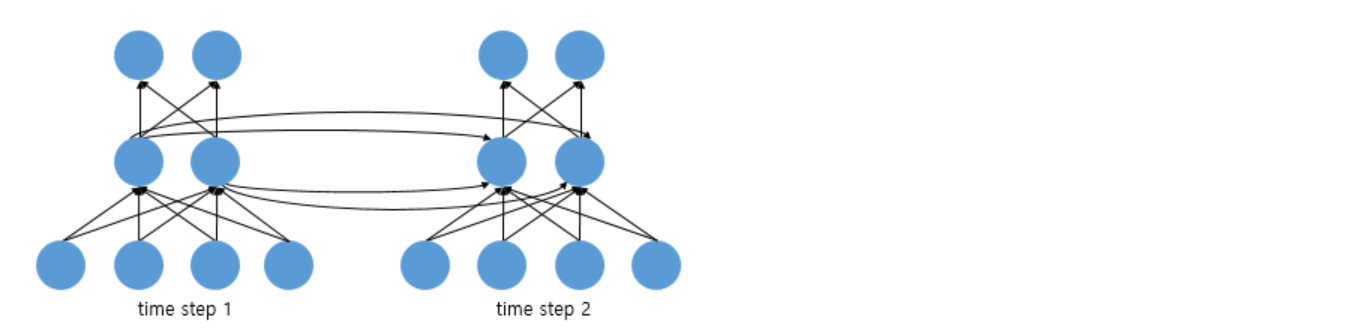

In [3]:
Image("r3.PNG")

- 위와 같은 상태의 RNN이 시점이 2일 때의 모습
    - 입력 벡터의 차원 : 4
    - 은닉 상태의 크기 : 2
    - 출력 벡터의 차원 : 2
- 뉴런 단위로 해석
    - 입력층의 뉴런 수 : 4
    - 은닉층의 뉴런 수 : 2
    - 출력층의 뉴런 수 : 2

##### 6) RNN의 다양한 형태
    - RNN은 입력과 출력의 길이를 다르게 설계할 수 있으므로 다양한 용도로 사용할 수 있다.
    - RNN셀의 각 시점 별 입력, 출력의 단위는 사용자가 정의하기 나름이지만 가장 보편적인 단위는 '단어 벡터'

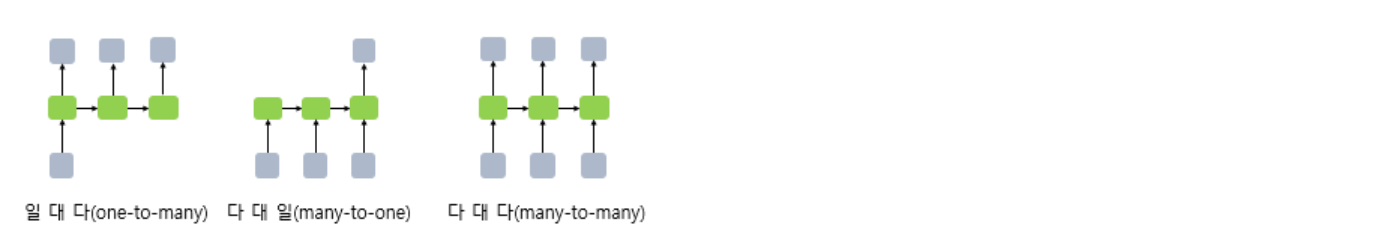

In [4]:
Image("r4.PNG")

##### 6-1) one-to-many 모델
- 하나의 입력에 대해서 여러개를 출력하는 모델 
    - 이미지 캡셔닝(Image Captioning)
    - 하나의 이미지 입력에 대해 사진의 제목 출력
    - 사진의 제목은 단어들의 나열이므로 시퀀스 출력 !

##### 6-2) many-to-one 모델
- 여러개의 입력에 대해서 하나를 출력하는 모델 
    - 메일이 정상 메일인지 스팸 메일인지 판별하는 스팸 메일 분류(spam detection)
    - 입력 문서가 긍정적인지 부정적인지를 판별하는 감성 분류(sentiment classification)

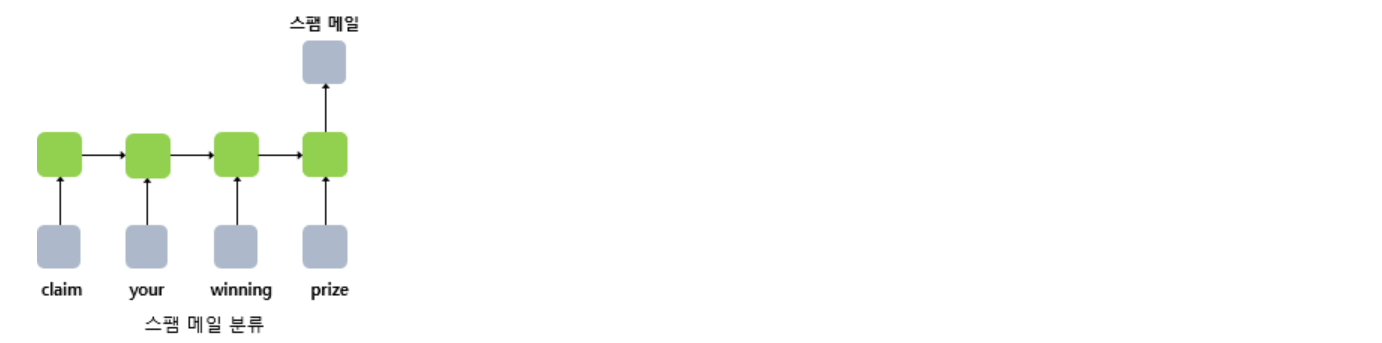

In [6]:
Image("r5.PNG")

##### 6-3) many-to-many 모델
- 입력 문장으로부터 대답 문장을 출력하는 챗봇
- 입력 문장으로부터 번역된 문장을 출력하는 번역기
- 개체명 인식
- 품사 태깅

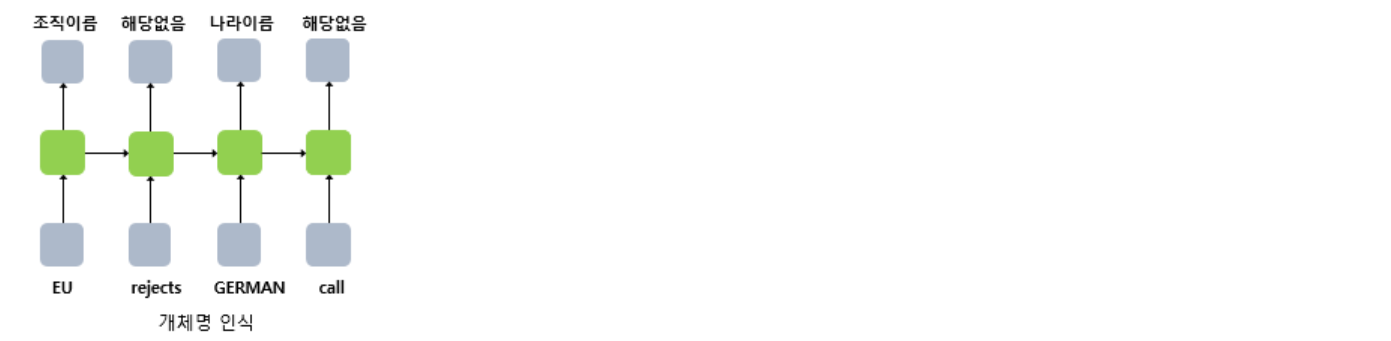

In [7]:
Image("r6.PNG")

##### 7) RNN에 대한 수식 정의
- h_t : 현재 시점 t에서의 은닉 상태값
- 은닉층의 메모리 셀은 h_t를 계산하기 위해서 총 2개의 가중치를 갖게 된다.
    - W_x : 입력층에서의 입력값을 위한 가중치
    - W_h : 이전 시점 t-1의 은닉 상태값인 h_t-1을 위한 가중치

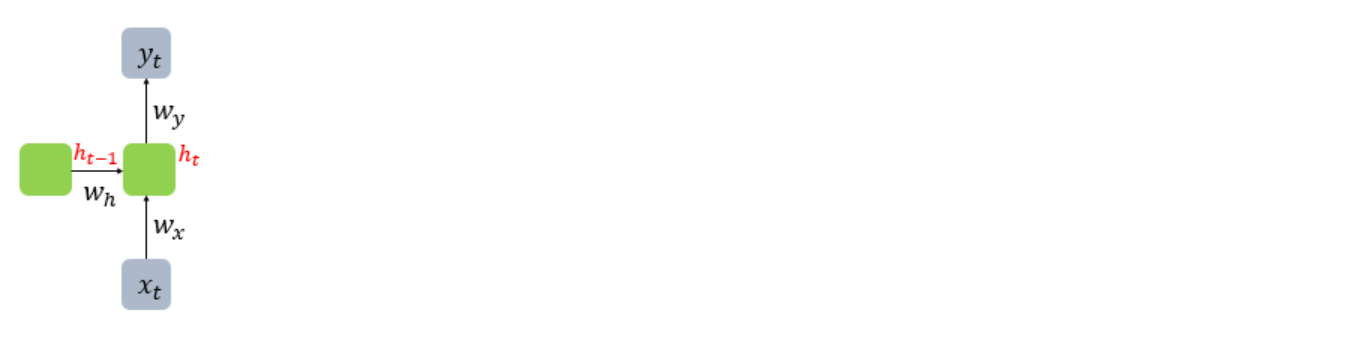

In [9]:
Image("r7.PNG")

- 위의 내용을 식으로 표현

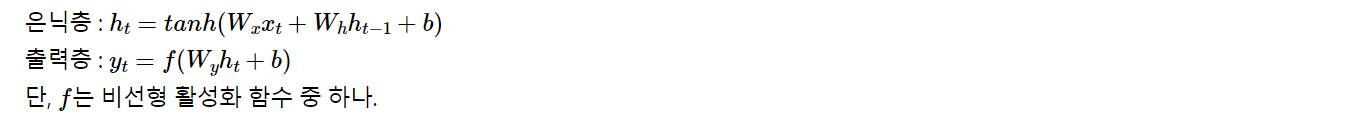

In [10]:
Image("r8.PNG")

- RNN의 은닉층 연산은 벡터와 행렬 연산
    - 자연어 처리에서 RNN의 입력 x_t : (대부분) 단어 벡터
    - **d : 단어 벡터의 차원**
    - **D_h : 은닉 상태의 크기**
- 각 벡터와 행렬의 크기

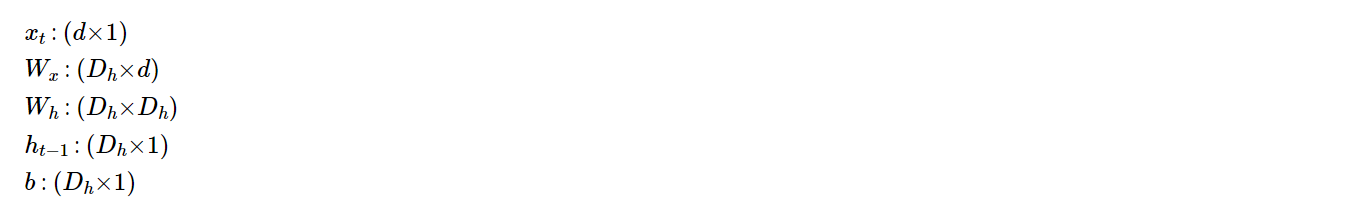

In [11]:
Image("r9.PNG")

- 배치 크기가 1, d와 D_h 두 값 모두를 4로 가정했을 때, RNN의 은닉층 연산을 그림으로 표현
    - h_t를 계산하기 위한 활성화 함수 : 주로 하이퍼볼릭탄젠트 함수(tanh), ReLU도 사용
    - 각각의 가중치 W_x, W_h, W_y의 값은 모든 시점에서 값을 동일하게 공유
        - 만약 은닉층이 2개 이상일 경우에는 은닉층 2개의 가중치는 서로 다르다.
    - 출력층은 결과값인 y_t를 계산하기 위한 활성화 함수
        - 상황에 따라 다르다.
        - 이진 분류 : 시그모이드 함수
        - 다양한 카테고리 중에서 선택 : 소프트맥스 함수

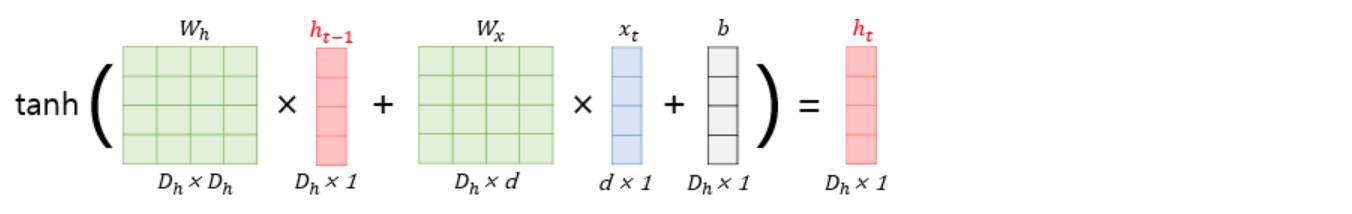

In [12]:
Image("r10.PNG")

------------------------------------------------------------------------------------------------------------

#### 2. 파이썬으로 RNN 구현하기
- Numpy로 RNN 층을 구현
- 앞서 메모리 셀에서 은닉 상태를 계산하는 식
    - h_t = tanh(Wx*Xt + Wh*Xt-1 + b)

##### 1) 아래의 코드는 의사 코드(pseudocode)
- hidden_state : t 시점의 은닉 상태
- input_length : 입력 데이터의 길이
    - 입력 데이터의 길이는 곧 총 시점의 수(timesteps)
- input_t : t 시점의 입력값
- 각 메모리 셀은 시점마다 input_t, hidden_state_t(이전 상태의 은닉 상태)를 입력으로 활성화 함수인 하이퍼볼릭탄젠트 함수를 통해 현재 시점의 hidden_state_t를 계산

In [ ]:
# 초기 은닉 상태를 0(벡터)로 초기화
hidden_state_t = 0

# 각 시점마다 입력을 받는다.
for input_t in input_length : 
    # 각 시점에 대해서 입력과 은닉 상태를 가지고 연산
    output_t = tanh(input_t, hidden_state_t)
    # 계산 결과는 현재 시점의 은닉 상태가 된다.
    hidden_state_t = output_t

##### 2) RNN 층을 실제 동작되는 코드로 구현
- 이해를 돕기 위해 (timesteps, input_size) 크기의 2D 텐서를 입력으로 받았다고 가정
- 실제로 파이토치에서는 (batch_size, timesteps, input_size)의 크기의 3D 텐서를 입력으로 받는 것을 기억

In [20]:
import numpy as np
# 시점의 수(NLP에서는 보통 문장의 길이)
timesteps = 10
# 입력의 차원(NLP에서는 보통 단어 벡터의 차원)
input_size = 4
# 은닉 상태의 크기(메모리 셀의 용량)
hidden_size = 8

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_size))

# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_size,))

# 은닉 상태의 크기 hidden_size로 은닉 상태를 만듦

In [22]:
# 8의 크기를 가지는 은닉 상태(현재는 초기 은닉 상태로 모든 차원이 0의 값)
print(hidden_state_t)

[0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
# 가중치와 편향 정의

# (8,4) 크기의 2D 텐서 생성(입력에 대한 가중치)
Wx = np.random.random((hidden_size, input_size)) 
# (8,8) 크기의 2D 텐서 생성(은닉 상태에 대한 가중치)
Wh = np.random.random((hidden_size, hidden_size))
# (8,) 크기의 1D 텐서 생성(편향)
b = np.random.random((hidden_size,))

In [24]:
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

(8, 4)
(8, 8)
(8,)


##### 3) 모든 시점의 은닉 상태를 출력한다고 가정하고 RNN층 동작

In [38]:
total_hidden_states = []

# 메모리 셀 동작
# 각 시점에 따라서 입력값이 입력됨
for input_t in inputs : 
    output_t = np.tanh(np.dot(Wx, input_t) + np.dot(Wh, hidden_state_t) + b)
    # 각 시점의 은닉 상태의 값을 계속해서 축적
    total_hidden_states.append(list(output_t))
    # 각 시점 t별 메모리 셀의 출력 크기는 (timestep, output_dim)
    print(np.shape(total_hidden_states))
    hidden_state_t = output_t

# 출력 시 값을 깔끔하게 해준다.
total_hidden_states = np.stack(total_hidden_states, axis=0)

# (timestep, output_dim)의 크기
# 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력
print(total_hidden_states)

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.99998619 0.99999357 0.99976714 0.99998145 0.9999917  0.99998926
  0.99990305 0.99989609]
 [0.99994771 0.99997271 0.99898552 0.999935   0.99996976 0.99995174
  0.99981632 0.99953222]
 [0.99991235 0.99992561 0.99818347 0.99986468 0.999955   0.99992752
  0.99974973 0.99937397]
 [0.99998586 0.99999448 0.99978558 0.99998282 0.9999927  0.99998913
  0.99993747 0.99990157]
 [0.99998178 0.99998946 0.9996084  0.99998448 0.99998706 0.99997074
  0.99993338 0.99975161]
 [0.99998857 0.99999592 0.99979877 0.9999924  0.99999303 0.99998114
  0.99997337 0.99984743]
 [0.99999013 0.9999977  0.999872   0.99998954 0.99999511 0.99999291
  0.99995729 0.99993071]
 [0.99994674 0.99998544 0.99924702 0.99993758 0.99997767 0.99996448
  0.99989286 0.99965052]
 [0.99999037 0.99999664 0.99983829 0.99999256 0.99999414 0.99998694
  0.99996879 0.99988904]
 [0.99998614 0.99999677 0.99980865 0.99998478 0.99999262 0.99999002
  0.99993291 0.9998946 ]

--------------------------------------------------------------------------------------------------------------

#### 3. 파이토치의 nn.RNN()

In [39]:
import torch
import torch.nn as nn

- 입력 크기와 은닉 상태의 크기 정의
    - 은닉 상태의 크기 : 대표적인 RNN의 하이퍼파라미터
    - 입력 크기 : 매 시점마다 들어가는 입력의 크기

In [40]:
input_size = 5
hidden_size = 8

- 입력 텐서를 정의
    - (배치크기 x 시점의 수 x 매 시점마다 들어가는 입력)의 크기를 가진다.
    - 여기서는 배치 크기는 1, 10번의 시점동안 5차원의 입력 벡터가 들어가도록 텐서를 정의)

In [41]:
inputs = torch.Tensor(1, 10, 5)

- nn.RNN()을 사용하여 RNN 셀을 만든다.
    - 인자로 입력의 크기, 은닉 상태의 크기를 정의
    - batch_first = True를 통해서 입력 텐서의 첫번째 차원이 배치 크기임을 알려준다.

In [43]:
cell = nn.RNN(input_size, hidden_size, batch_first=True)

- 입력 텐서를 RNN 셀에 입력하여 출력 확인

In [45]:
outputs, _status = cell(inputs)

- RNN 셀은 두개의 입력을 리턴
    - 첫번째 리턴값 : 모든 시점의 은닉 상태들
        - (1, 10, 8)의 크기 : 10번의 시점 동안 8차원의 은닉 상태가 출력되었다는 의미
    - 두번째 리턴값 : 마지막 시점의 은닉 상태
        - (1, 1, 8) : (층의 개수, 배치 크기, 은닉 상태의 크기)

In [46]:
print(outputs.shape)
print(_status.shape)

torch.Size([1, 10, 8])
torch.Size([1, 1, 8])


----------------------------------------------------------------------------------------------------------

#### 4. 깊은 순환 신경망(Deep Recurrent Neural Network)
- 앞서 RNN도 다수의 은닉층을 가질 수 있다고 언급
- 아래의 그림은 순환 신경망에서 은닉층이 1개 더 추가되어, 은닉층이 2개인 깊은 순환 신경망의 모습
- 깊은 순환 신경망을 파이토치로 구현할 때는 nn.RNN()의 인자인 num_layers에 값을 전달하여 층을 쌓는다.

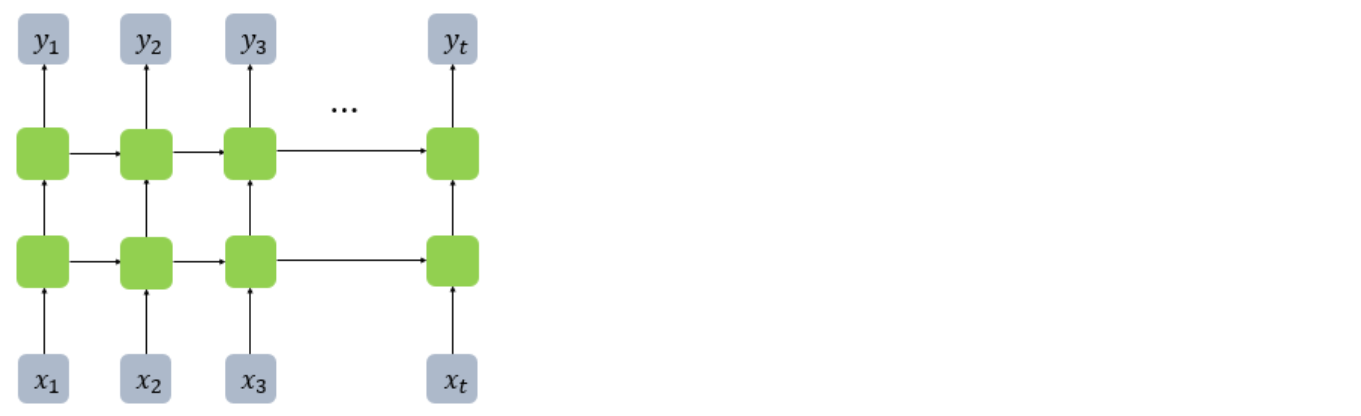

In [47]:
Image("r11.PNG")

In [48]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [49]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first = True)

In [50]:
outputs, _status = cell(inputs)

In [52]:
print(outputs.shape)
print(_status.shape)

torch.Size([1, 10, 8])
torch.Size([2, 1, 8])


- -----------------------------------------------------------------------------------------------------------

#### 5. 양방향 순환 신경망(Bidirectional Recurrent Neural Network)
- 시점 t에서의 출력값을 예측할 때 이전 시점의 데이터 뿐만 아니라, 이후 데이터로도 예측할 수 있다는 아이디어에 기반
- 영어 빈칸 채우기 문제에 비유

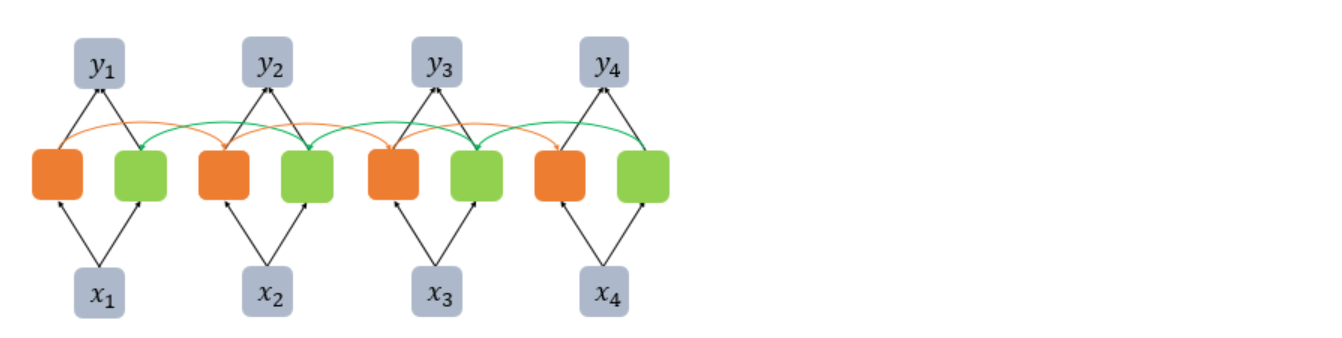

In [53]:
Image("r12.PNG")

##### 1) 은닉층 1개인 양방향 RNN
- RNN이 과거 시점(time step)의 데이터들을 참고해서 찾고자하는 정답을 예측하지만 실제 문제에서는 과거 시점의 데이터만 고려하는 것이 아니라 향후 시점의 데이터에 힌트가 있는 경우도 많다.
- 이전 시점의 데이터뿐만 아니라, 이후 시점의 데이터도 힌트로 활용하기 위해서 고안된 것이 양방향 RNN
- 하나의 출력값을 예측하기 위해 기본적으로 두 개의 메모리 셀을 사용
    - 첫번째 메모리 셀 : 앞에서 배운 것처럼 **앞 시점의 은닉 상태(Forward States)를 전달받아 현재의 은닉 상태를 계산(주황색 메모리 셀)
    - 두번째 메모리 셀 : 앞 시점의 은닉 상태가 아니라 뒤 시점의 은닉 상태(Backward States)를 전달 받아 현재의 은닉 상태를 계산(초록색 메모리 셀)
    - 이 두개의 값 모두가 출력층에서 출력값을 예측하기 위해 사용된다.
    

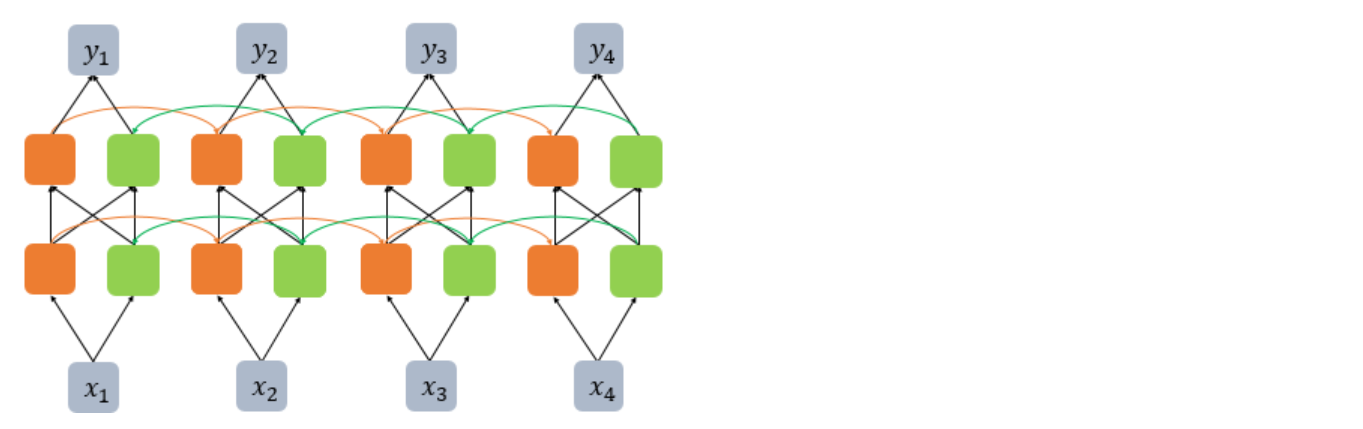

In [54]:
Image("r13.PNG")

##### 2) 은닉층 2개인 양방향 RNN
- 은닉층을 무조건 추가한다고 해서 모델의 성능이 좋아지는 것은 아니다.
- 추가하면 학습할 수 있는 양이 많아지지만 또한 반대로 훈련 데이터 또한 그만큼 많이 필요하다.
- 양방향 순환 신경망을 파이토치로 구현할 때는 nn.RNN()의 인자인 **bidirectional 값을 True**로 전달

In [55]:
# (batch_size, time_steps, input_size)
inputs = torch.Tensor(1, 10, 5)

In [56]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first = True, bidirectional=True)

In [57]:
outputs, _status = cell(inputs)

In [59]:
# (배치크기, 시퀀스 길이, 은닉 상태의 크기 x 2)
print(outputs.shape)

# (층의 개수 x2, 배치크기, 은닉 상태의 크기)
print(_status.shape)

torch.Size([1, 10, 16])
torch.Size([4, 1, 8])


- 첫번째 리턴값에서 은닉 상태의 크기 두배 : 양방향의 은닉 상태 값들이 연결(concatenate)되었기 때문
- 두번째 리턴값의 크기 : 정방향 기준으로는 마지막 시점에 해당되면서, 역방향 시준에서는 첫번째 시점에 해당되는 시점의 출력값을 층의 개수만큼 쌓아 올린 결과값